In [1]:
import os, sys, pickle
import numpy as np
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path = list(set(sys.path))
import matplotlib.pyplot as plt
%matplotlib inline

from common.evaluate import make_vis_env, test_env

from flow.multiagent_envs import MultiWaveAttenuationMergePOEnv
from flow.scenarios import MergeScenario
from flow.utils.registry import make_create_env
from flow.utils.rllib import FlowParamsEncoder
from ray.tune import run_experiments

import gym, ray
from ray.rllib.agents.ppo import PPOAgent, DEFAULT_CONFIG
from ray.tune.registry import register_env
from ray.tune.logger import pretty_print

benchmark_name = 'multi_merge'

In [2]:
benchmark = __import__(
    "flow.benchmarks.%s" % benchmark_name, fromlist=["flow_params"])
flow_params = benchmark.flow_params
horizon = flow_params['env'].horizon

def make_env(create_env):
    def _thunk():
        env = create_env()
        return env
    return _thunk

create_env, env_name = make_create_env(params=flow_params, version=0)

In [3]:
env = create_env()

In [4]:
for i in range(5):
    vel = []
    state = env.reset()
    for _ in range(env.env_params.horizon):
        v = np.mean(env.k.vehicle.get_speed(env.k.vehicle.get_ids()))
        if v < 0:
            v = vel[-1]
        vel.append(v)
        state, r, _, _ = env.step({})
    print(np.mean(vel))
    if i == 0:
        vels = np.array(vel)
    else:
        vels = np.vstack((vels, np.array(vel)))

8.1659660732453
8.996392816973868
8.250622291187229
9.071936517185941
19.044555982251463


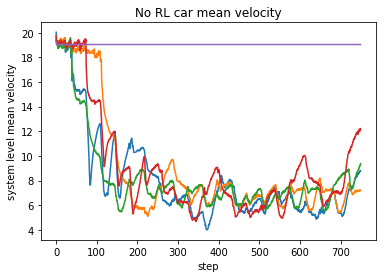

In [5]:
title = 'No RL car mean velocity'
savepath = '../result/MultiAgent/' + title.replace(' ', '_') + '.png'

fig = plt.figure()
fig.clf()
plt.title(title)
plt.ylabel('system level mean velocity')
plt.xlabel('step')
for vel in vels:
    plt.plot(vel)

In [6]:
plt.savefig(savepath)

<Figure size 432x288 with 0 Axes>